In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/laptopData.csv")

In [5]:
df.head(10)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [9]:
df.shape


(1303, 12)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [41]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
categorical_cols=df.select_dtypes(include=['object']).columns

In [43]:
print(numerical_cols)

Index(['Unnamed: 0', 'Price'], dtype='object')


In [45]:
print(categorical_cols)

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


In [47]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [49]:
df.fillna(df.mode(),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

In [51]:
df.isnull()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False


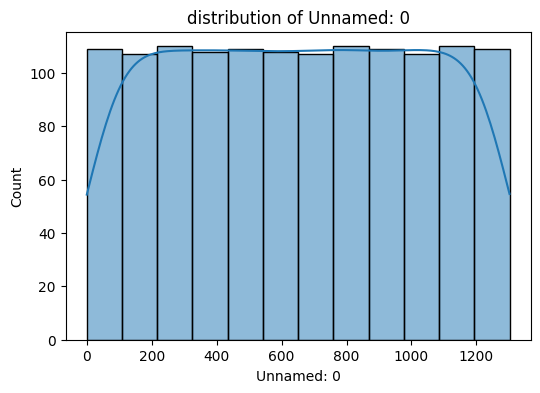

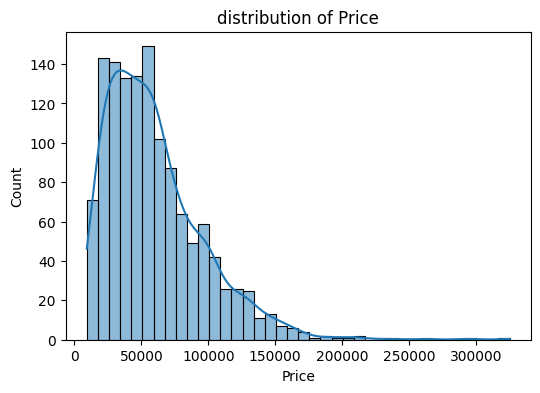

In [57]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)
    plt.title(f'distribution of {col}')
    plt.show()

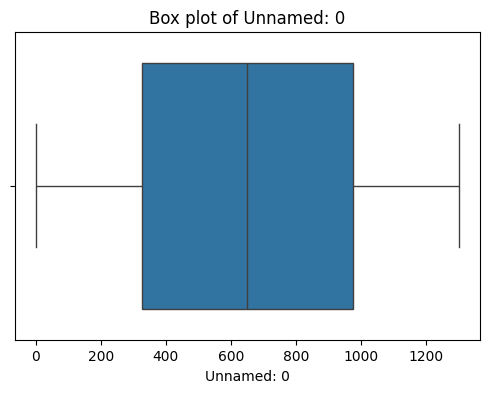

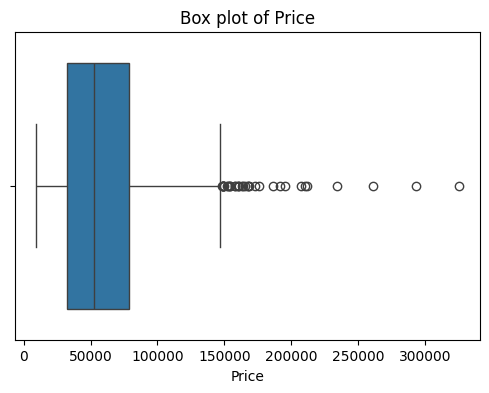

In [61]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [63]:
df[categorical_cols].nunique()

Company              19
TypeName              6
Inches               25
ScreenResolution     40
Cpu                 118
Ram                  10
Memory               40
Gpu                 110
OpSys                 9
Weight              189
dtype: int64

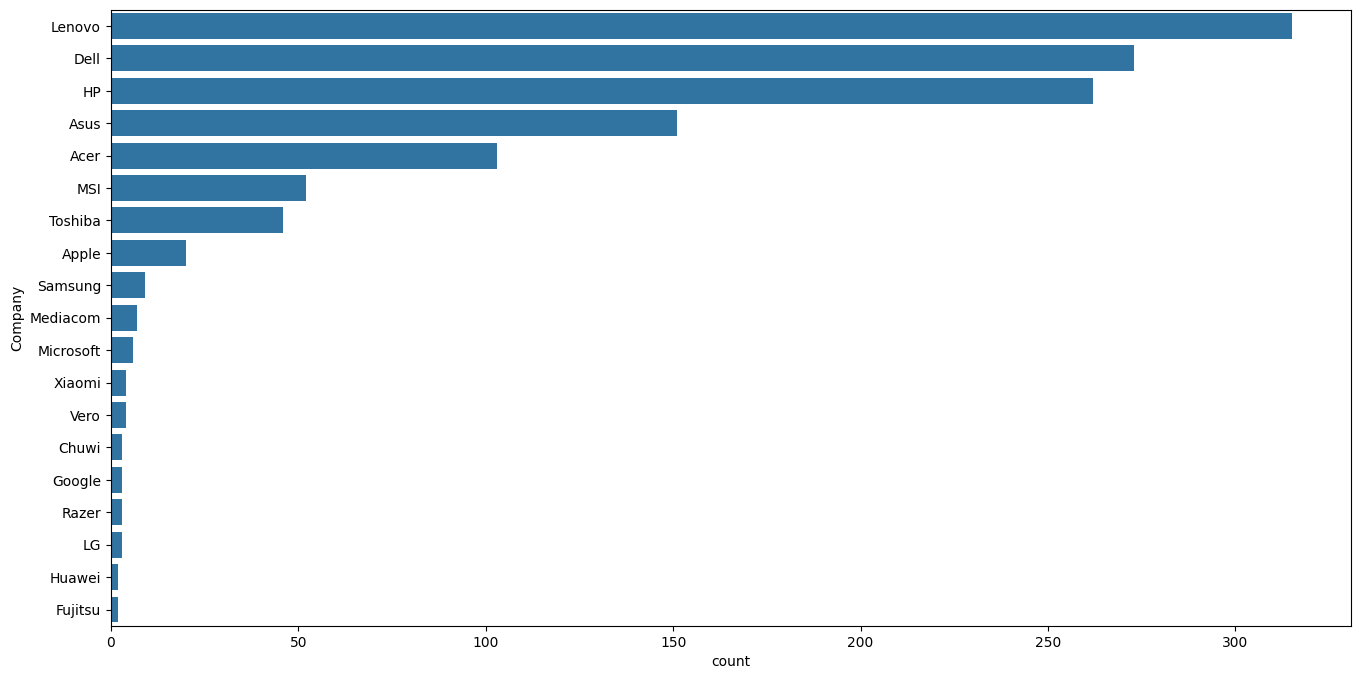

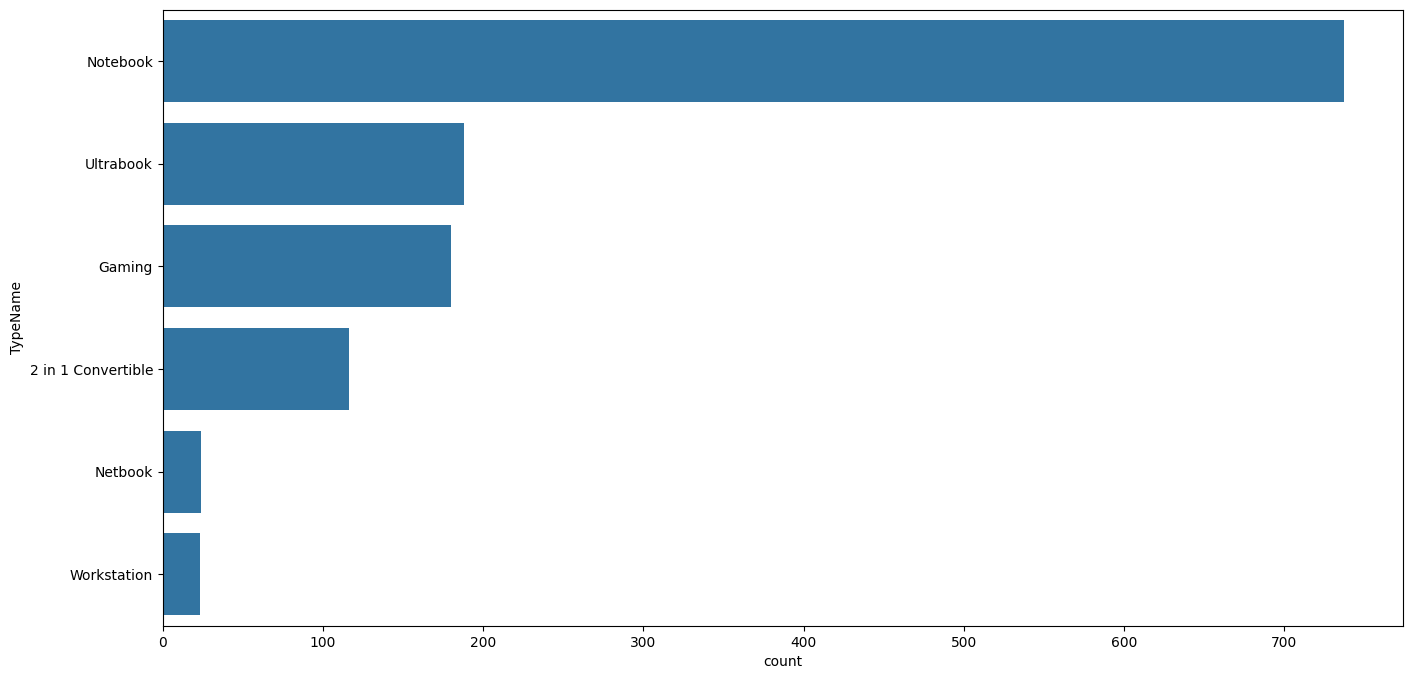

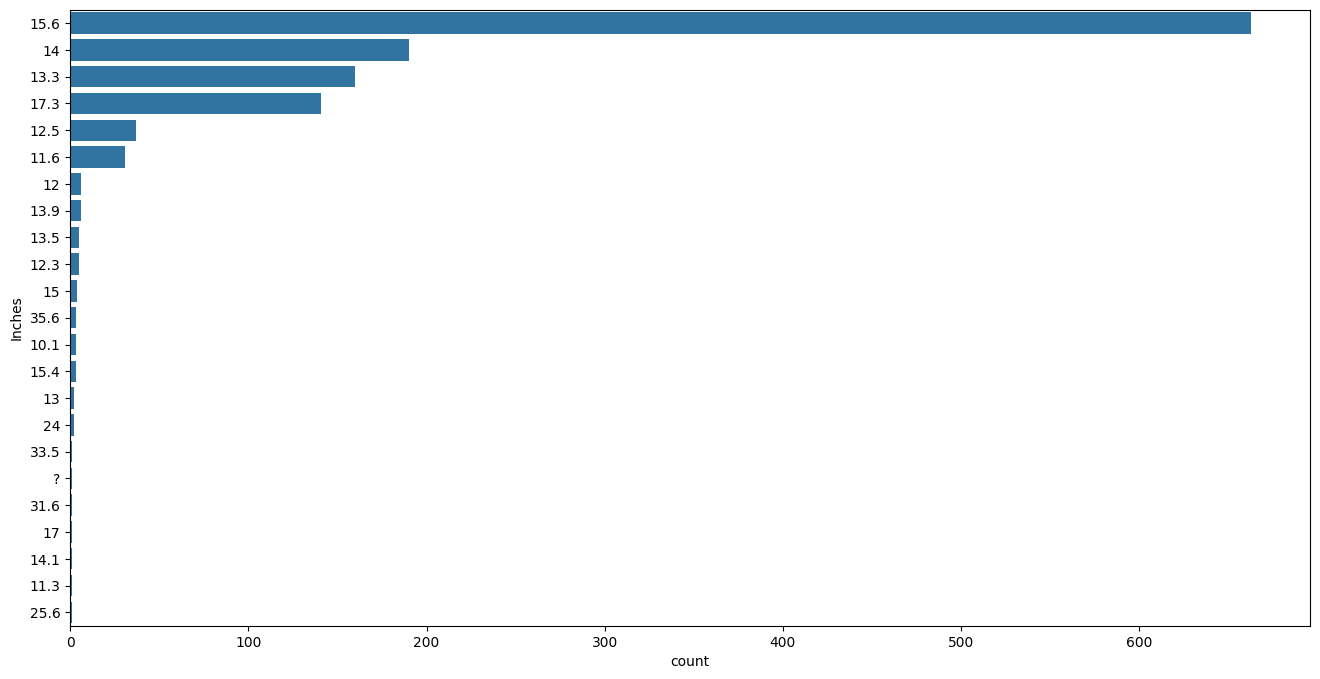

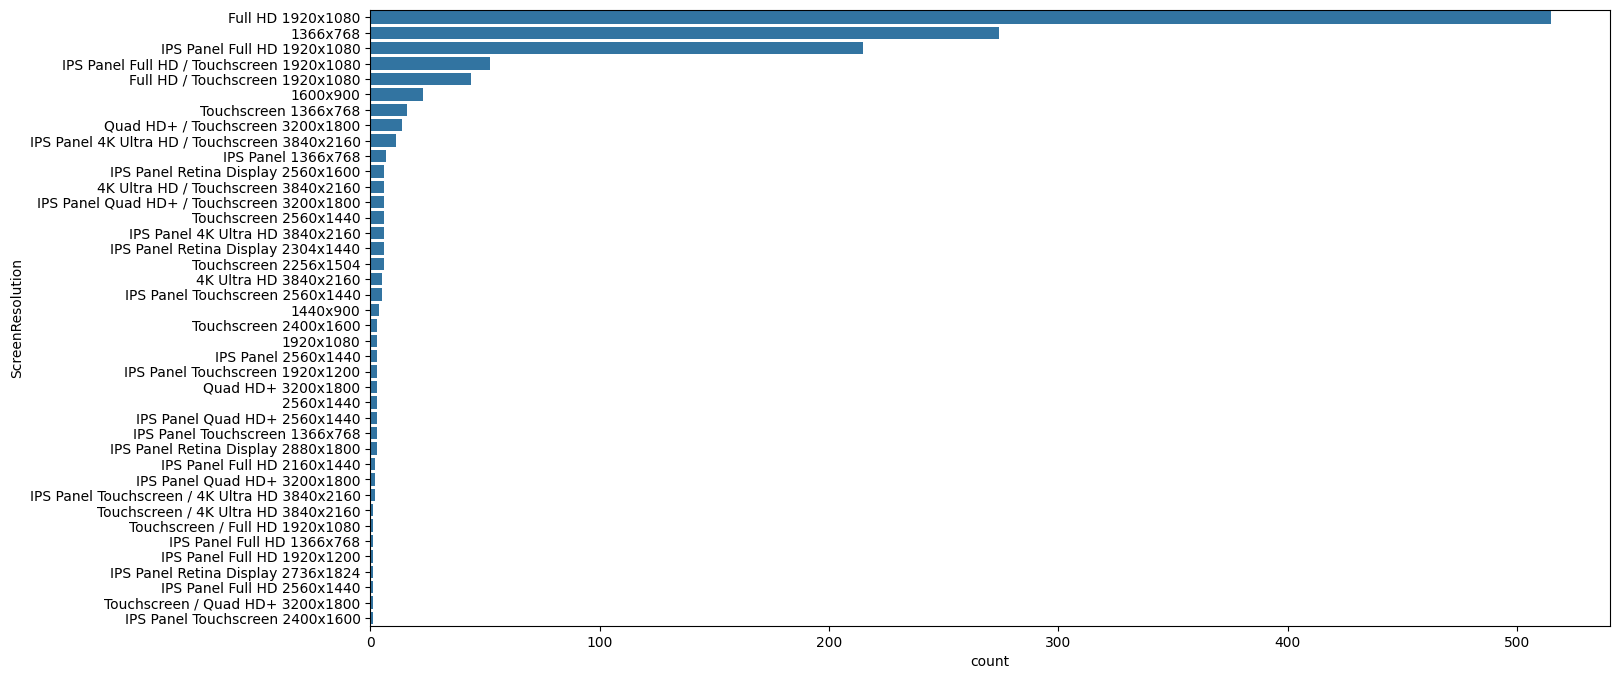

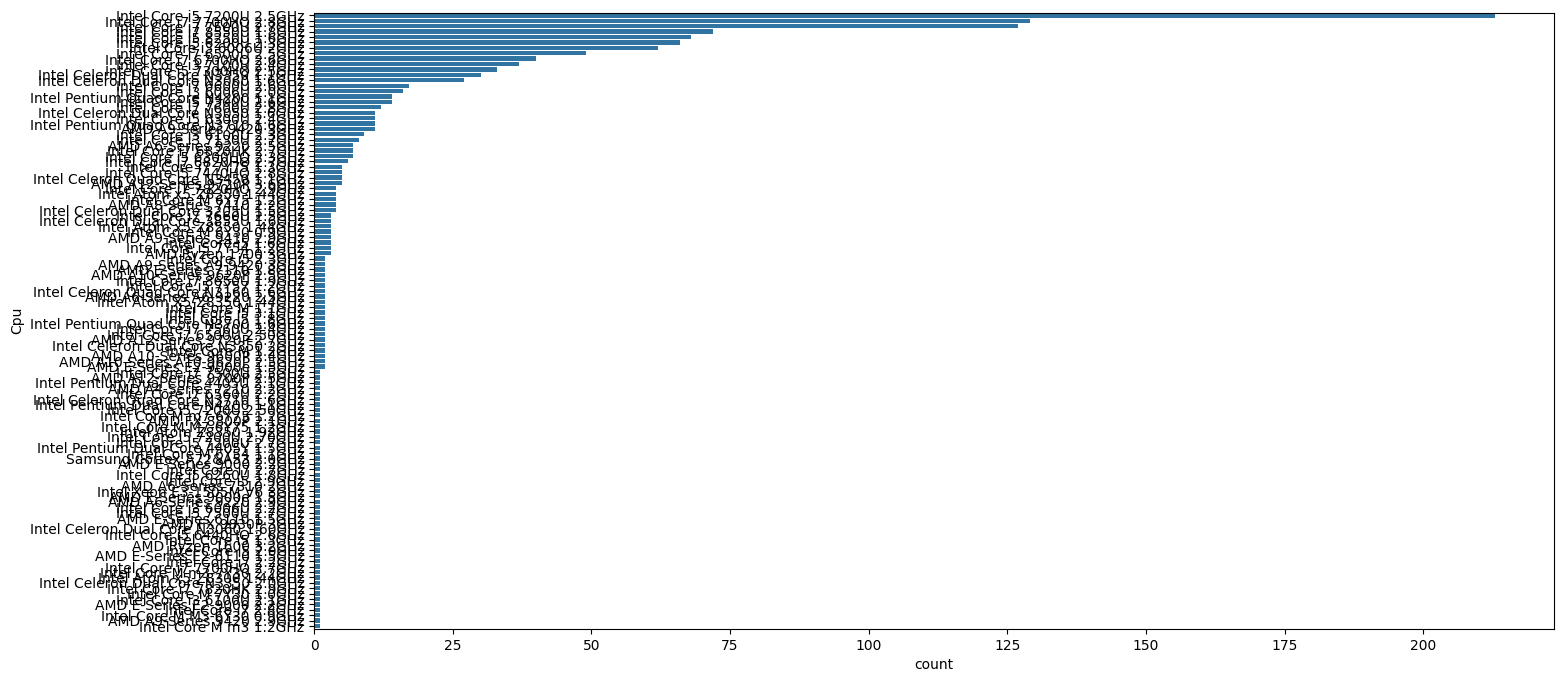

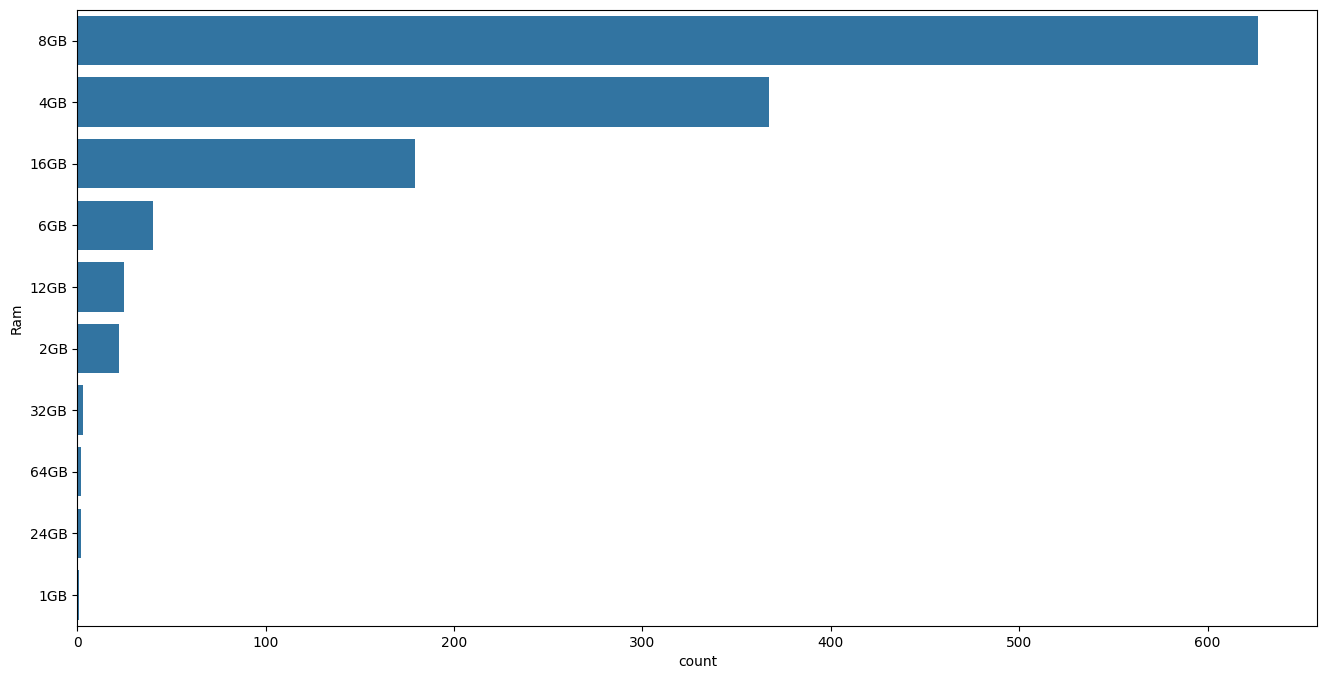

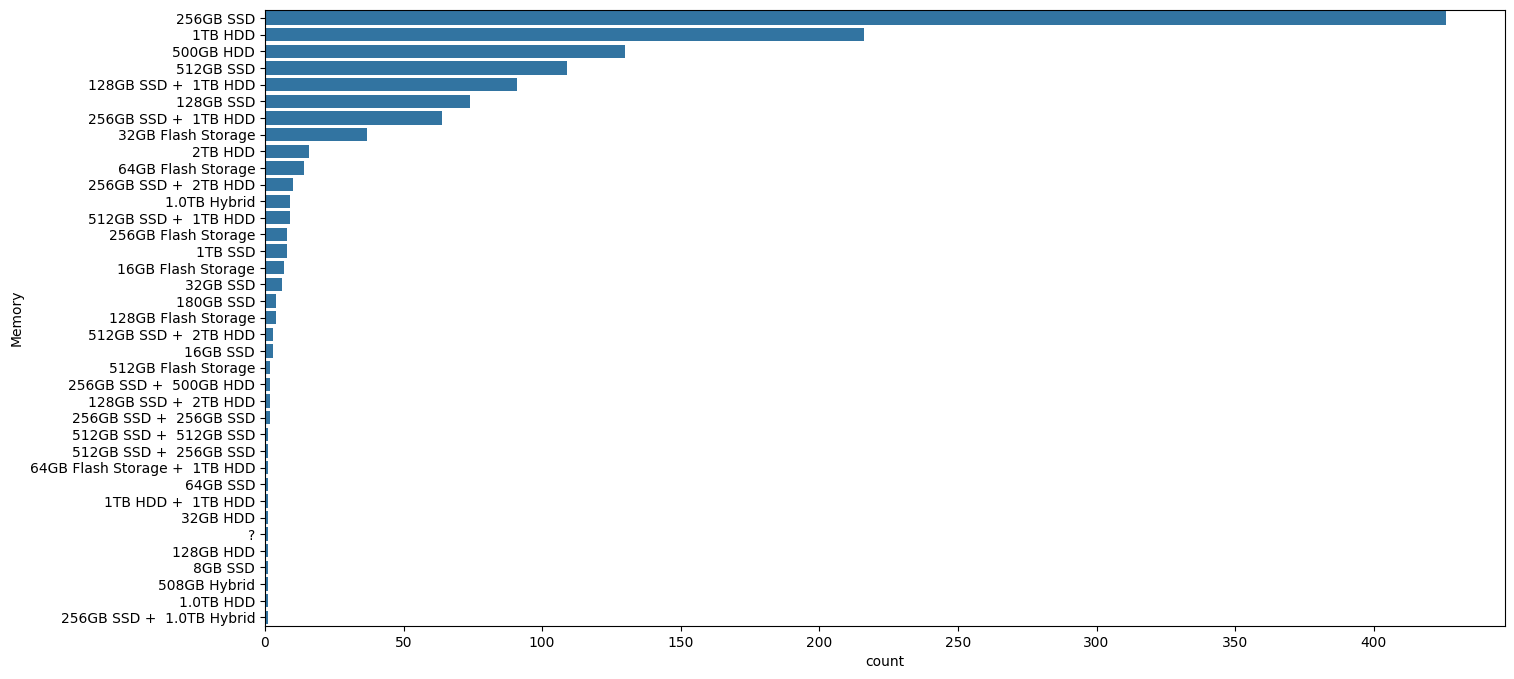

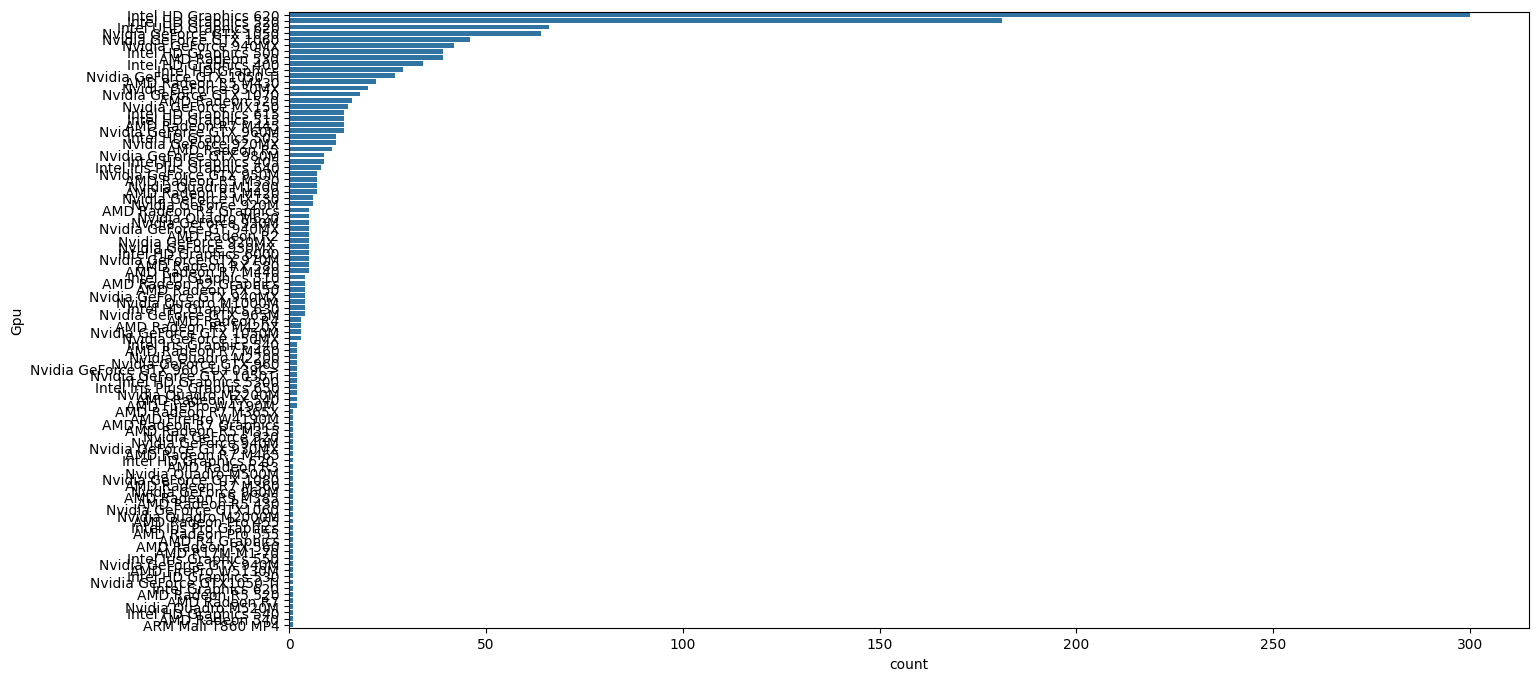

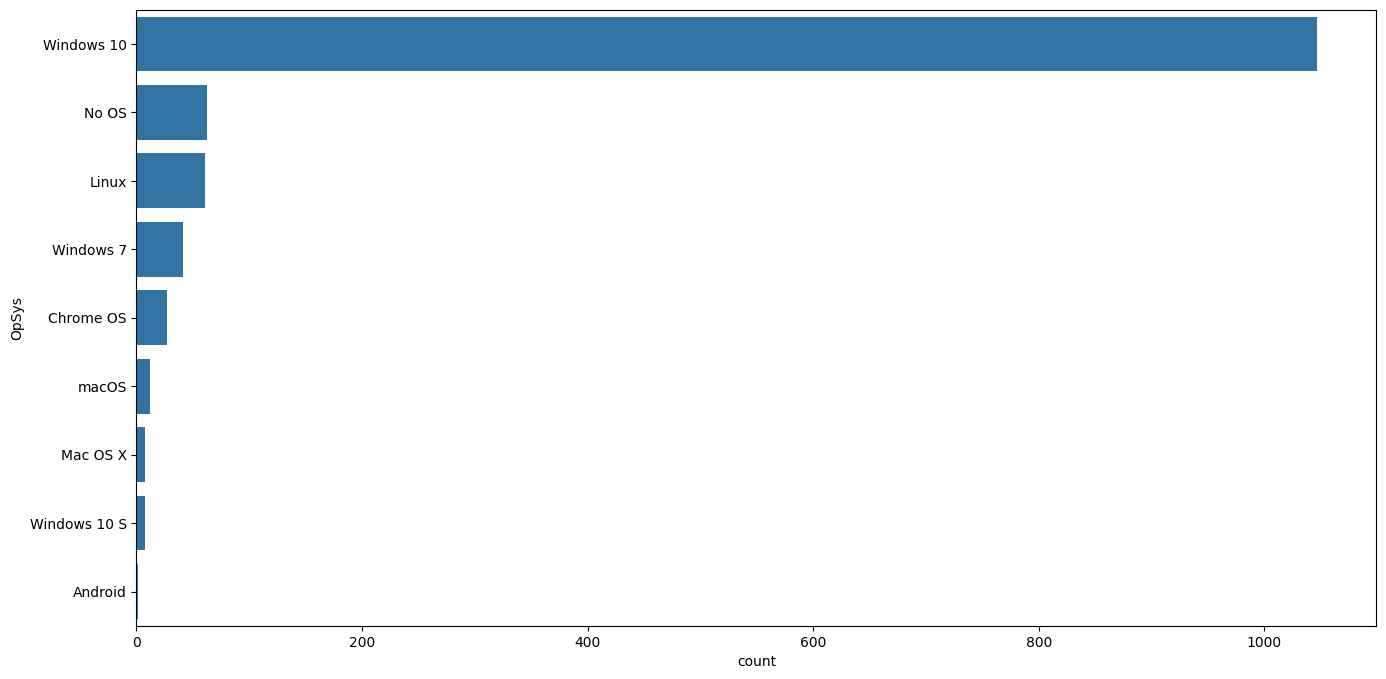

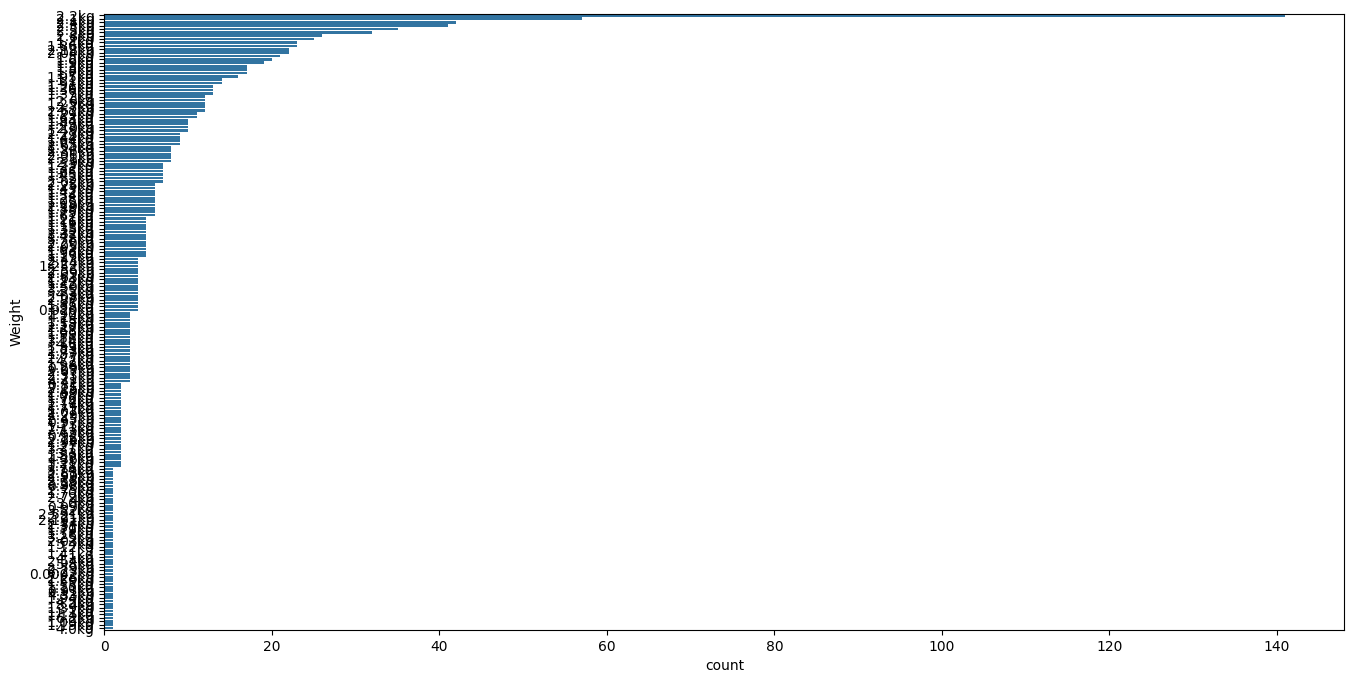

In [94]:
for col in categorical_cols:
    plt.figure(figsize=(16,8))
    sns.countplot(y=df[col],order=df[col].value_counts().index)
    plt.show()

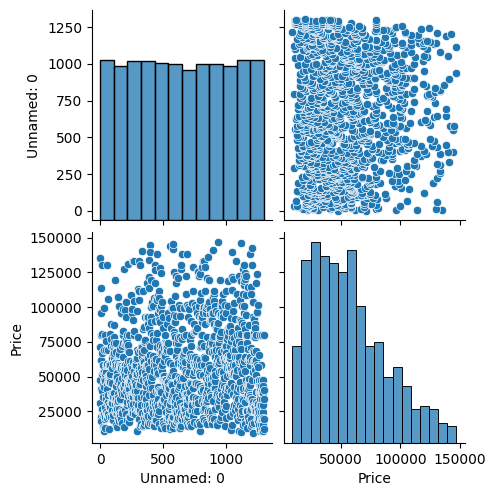

In [95]:
sns.pairplot(df[numerical_cols])
plt.show()

In [96]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [97]:
print(Q1)
print(Q3)
print(IQR)

Unnamed: 0      323.75
Price         31914.72
Name: 0.25, dtype: float64
Unnamed: 0      980.25
Price         74538.72
Name: 0.75, dtype: float64
Unnamed: 0      656.5
Price         42624.0
dtype: float64


In [98]:
df.to_csv('cleaned_dataset.csv',index=False)